In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

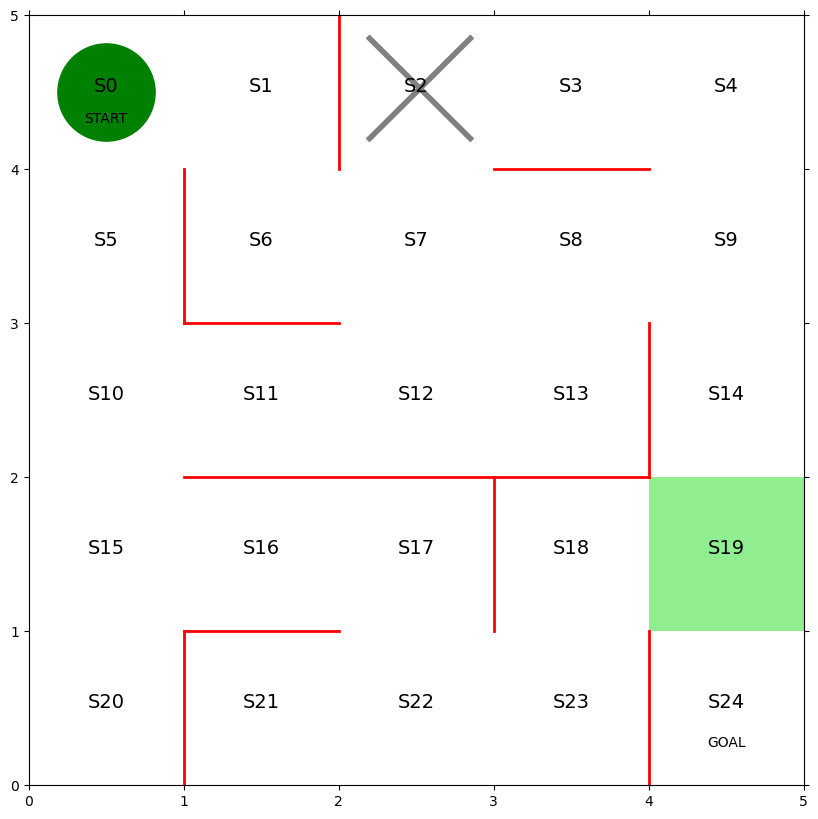

In [24]:
# 初期位置での迷路の様子

fig = plt.figure(figsize=(10, 10))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 2], [1, 1], color='red', linewidth=2)
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([2, 2], [5, 4], color='red', linewidth=2)
plt.plot([1, 2], [3, 3], color='red', linewidth=2)
plt.plot([1, 1], [4, 3], color='red', linewidth=2)
plt.plot([1, 4], [2, 2], color='red', linewidth=2)
plt.plot([4, 4], [2, 3], color='red', linewidth=2)
plt.plot([3, 3], [2, 1], color='red', linewidth=2)
plt.plot([3, 4], [4, 4], color='red', linewidth=2)
plt.plot([4, 4], [0, 1], color='red', linewidth=2)
rect = plt.Rectangle((4,1),1,1,fc="#90ee90")
ax.add_patch(rect)



# 状態を示す文字S0～S24を描く
plt.text(0.5, 4.5, 'S0', size=14, ha='center')
plt.text(1.5, 4.5, 'S1', size=14, ha='center')
plt.text(2.5, 4.5, 'S2', size=14, ha='center')
plt.text(3.5, 4.5, 'S3', size=14, ha='center')
plt.text(4.5, 4.5, 'S4', size=14, ha='center')
plt.text(0.5, 3.5, 'S5', size=14, ha='center')
plt.text(1.5, 3.5, 'S6', size=14, ha='center')
plt.text(2.5, 3.5, 'S7', size=14, ha='center')
plt.text(3.5, 3.5, 'S8', size=14, ha='center')
plt.text(4.5, 3.5, 'S9', size=14, ha='center')
plt.text(0.5, 2.5, 'S10', size=14, ha='center')
plt.text(1.5, 2.5, 'S11', size=14, ha='center')
plt.text(2.5, 2.5, 'S12', size=14, ha='center')
plt.text(3.5, 2.5, 'S13', size=14, ha='center')
plt.text(4.5, 2.5, 'S14', size=14, ha='center')
plt.text(0.5, 1.5, 'S15', size=14, ha='center')
plt.text(1.5, 1.5, 'S16', size=14, ha='center')
plt.text(2.5, 1.5, 'S17', size=14, ha='center')
plt.text(3.5, 1.5, 'S18', size=14, ha='center')
plt.text(4.5, 1.5, 'S19', size=14, ha='center')
plt.text(0.5, 0.5, 'S20', size=14, ha='center')
plt.text(1.5, 0.5, 'S21', size=14, ha='center')
plt.text(2.5, 0.5, 'S22', size=14, ha='center')
plt.text(3.5, 0.5, 'S23', size=14, ha='center')
plt.text(4.5, 0.5, 'S24', size=14, ha='center')
plt.text(0.5, 4.3, 'START', ha='center')
plt.text(4.5, 0.25, 'GOAL', ha='center')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [4.5], marker="o", color='g', markersize=70)

# トラップ仕掛ける
plt.plot([2.2, 2.85], [4.85, 4.2], color='grey', linewidth=4)
plt.plot([2.2, 2.85], [4.2, 4.85], color='grey', linewidth=4)

In [25]:
# 行は状態0～24、列は移動方向で↑、→、↓、←を表す

theta_0 = np.array([[np.nan, 1, 1, np.nan],
                    [np.nan, np.nan, 1, 1],
                    [np.nan, 1, 1, np.nan],
                    [np.nan, 1, np.nan, 1],
                    [np.nan, np.nan, 1, 1],
                    [1, np.nan, 1, np.nan],
                    [1, 1, np.nan, np.nan],
                    [1, 1, 1, 1],
                    [np.nan, 1, 1, 1],
                    [1, np.nan, 1, 1],
                    [1, 1, 1, np.nan],
                    [np.nan, 1, np.nan, 1],
                    [1, 1, np.nan, 1],
                    [1, np.nan, np.nan, 1],
                    [1, np.nan, 1, np.nan],
                    [1, 1, 1, np.nan],
                    [np.nan, 1, np.nan, 1],
                    [np.nan, np.nan, 1, 1],
                    [np.nan, 1, 1, np.nan],
                    [1, np.nan, 1, 1],
                    [1, np.nan, np.nan, np.nan],
                    [np.nan, 1, np.nan, np.nan],
                    [1, 1, np.nan, 1],
                    [1, np.nan, np.nan, 1], #※s24はゴールなので、方策はなし
                    ])

In [26]:
def simple_convert_into_pi_from_theta(theta):
    '''単純に割合を計算する'''

    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :]) 

    pi = np.nan_to_num(pi)

    return pi

# ランダム行動方策pi_0を求める
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [27]:
# 初期の行動価値関数Qを設定

[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0

In [28]:
# ε-greedy法を実装


def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]

    # 行動を決める
    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]

    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3

    return action


def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]

    # 行動から次の状態を決める
    if next_direction == "up":
        s_next = s - 5
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 5
    elif next_direction == "left":
        s_next = s - 1

    return s_next

In [29]:
# Sarsaによる行動価値関数Qの更新


def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):

    if s_next == 24:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])

    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])

    return Q

In [30]:
# Sarsaで迷路を解く関数の定義、状態と行動の履歴および更新したQを出力


def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト

    while (1):
        a = a_next

        s_a_history[-1][1] = a
        # 現在の状態（つまり一番最後なのでindex=-1）に行動を代入

        s_next = get_s_next(s, a, Q, epsilon, pi)
        # 次の状態を格納

        s_a_history.append([s_next, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく

        # 報酬を与え,　次の行動を求めます
        if s_next == 24:
            r = 1
            a_next = np.nan
        elif s_next == 2:
            r = -100
            s_next = 0
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            # 次の行動a_nextを求めます

        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)

        # 終了判定
        if s_next == 24:
            break
        else:
            s = s_next

    return [s_a_history, Q]

In [31]:
# Sarsaで迷路を解く

eta = 0.1  # 学習率
gamma = 0.9  # 時間割引率
epsilon = 0.5  # ε-greedy法の初期値
v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
is_continue = True
episode = 1

while is_continue:
    print("エピソード:" + str(episode))

    # ε-greedyの値を少しずつ小さくする
    epsilon = epsilon / 2

    # Sarsaで迷路を解き、移動した履歴と更新したQを求める
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

    # 状態価値の変化
    new_v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
    print(np.sum(np.abs(new_v - v)))  # 状態価値の変化を出力
    v = new_v

    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

    # 100エピソード繰り返す
    episode = episode + 1
    if episode > 100:
        break

エピソード:1
1.2548734751959607
迷路を解くのにかかったステップ数は114です
エピソード:2
2.1890355075301624
迷路を解くのにかかったステップ数は198です
エピソード:3
0.49842296345886516
迷路を解くのにかかったステップ数は64です
エピソード:4
0.36502406273454874
迷路を解くのにかかったステップ数は20です
エピソード:5
0.1914320199028639
迷路を解くのにかかったステップ数は14です
エピソード:6
0.19315500823893317
迷路を解くのにかかったステップ数は16です
エピソード:7
0.16258493979118582
迷路を解くのにかかったステップ数は14です
エピソード:8
0.14920247753165694
迷路を解くのにかかったステップ数は14です
エピソード:9
0.13640023030267506
迷路を解くのにかかったステップ数は14です
エピソード:10
0.1270860000451826
迷路を解くのにかかったステップ数は14です
エピソード:11
0.10562096790627679
迷路を解くのにかかったステップ数は12です
エピソード:12
0.1148641005941653
迷路を解くのにかかったステップ数は14です
エピソード:13
0.09627197001972865
迷路を解くのにかかったステップ数は12です
エピソード:14
0.10541510455410519
迷路を解くのにかかったステップ数は14です
エピソード:15
0.0877713331019861
迷路を解くのにかかったステップ数は12です
エピソード:16
0.08430267571987271
迷路を解くのにかかったステップ数は12です
エピソード:17
0.08093068681824195
迷路を解くのにかかったステップ数は12です
エピソード:18
0.07764550193257713
迷路を解くのにかかったステップ数は12です
エピソード:19
0.0744385647429418
迷路を解くのにかかったステップ数は12です
エピソード:20
0.07130274871979325
迷路を解くのにかかったステップ数

In [32]:
# 最終的な方策を確認
np.set_printoptions(precision=3, suppress=True)
print(Q)

[[  nan   nan 0.33    nan]
 [  nan   nan   nan 0.286]
 [  nan 0.284 0.403   nan]
 [  nan 0.347   nan   nan]
 [  nan   nan 0.376 0.815]
 [0.099   nan 0.379   nan]
 [0.742   nan   nan   nan]
 [  nan 0.648 0.493 0.467]
 [  nan 0.694 0.619 0.694]
 [0.792   nan 0.657 0.33 ]
 [0.377 0.377 0.439   nan]
 [  nan 0.038   nan 0.376]
 [0.95  0.049   nan 0.345]
 [0.952   nan   nan 0.278]
 [0.545   nan 0.585   nan]
 [0.119 0.505 0.391   nan]
 [  nan 0.575   nan 0.363]
 [  nan   nan 0.649 0.095]
 [  nan 0.9   0.396   nan]
 [0.389   nan 1.    0.544]
 [0.15    nan   nan   nan]
 [  nan 0.358   nan   nan]
 [0.235 0.726   nan 0.36 ]
 [0.809   nan   nan 0.034]]


In [33]:
# エージェントの移動の様子を可視化
from matplotlib import animation
from IPython.display import HTML


def init():
    # 背景画像の初期化
    line.set_data([], [])
    return (line,)


def animate(i):
    # フレームごとの描画内容
    state = s_a_history[i][0]  # 現在の場所を描く
    x = (state % 5) + 0.5  # 状態のx座標は、5で割った余り+0.5
    y = 4.5 - int(state / 5)  # y座標は5で割った商を4.5から引く
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

/var/folders/8z/fkj2n4xj3_lgyrrsc71xvtvm0000gn/T/ipykernel_61823/330215667.py:17: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)
